In [1]:
# Dependencies Part I (The first four cells and the comments below these two are given to us)
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies Part II (Note that parentheses comments are the ones I added in to help me better understand the work - Mark)
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper (Unlike the exercises done in class, since it imports the entirety of
import sqlalchemy                                # SQL-Alchemy, it needs the "sqlalchemy" prefix for it to work, but only
from sqlalchemy.ext.automap import automap_base  # for the ones that aren't specifically referenced)
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite (This doesn't necessarily need its own variable for its path, but can be used if needed)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found (Displaying results)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table (basically defining the variable for each of the classes)
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB (A reminder that this connection is temporary)
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Main Objective: Design a query to retrieve the last 12 months of precipitation data and plot the results, starting from
                # the most recent data point in the database.

# (Note: I Seperated each task individually, not necessarily in order from how it was originally)
    
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [10]:
# Calculate the date one year from the last date in data set.
prior_year = dt.date(2017,8,23) - dt.timedelta(days=365) # (Using the dt function will allow us to find the date
prior_year                                               # one year ago)

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores (it will take a 12-month period)
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prior_year).\
    order_by(measurement.date).all()

all_score = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])
precipitation_df.set_index("Date", inplace=True,)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


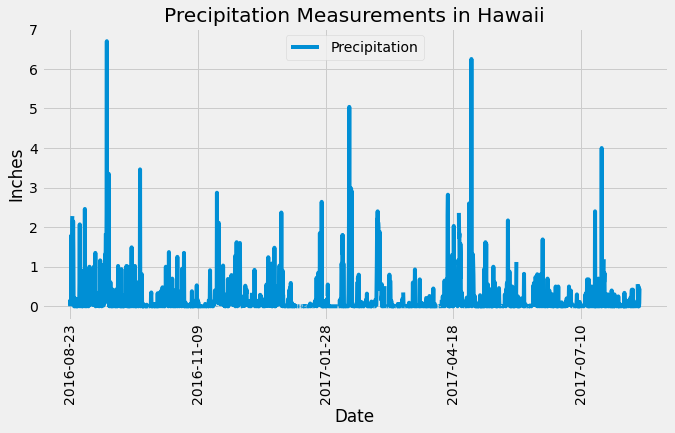

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data (Its not an exact copy of the image given to us, but its close)
precipitation_df.plot(title="Precipitation Measurements in Hawaii", figsize=(10,5),rot=90)
plt.legend(loc="upper center")
plt.ylabel("Inches")
plt.savefig("Images/Precipitation in Hawaii.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(measurement.station).distinct().count() # (".distinct()" is a form of .unique())
number_stations

9

In [16]:
# Design a query to find the most active stations [i.e. what stations have the most rows?]
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# (Most active station in the previous list is "USC00519281")
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
# (Note: parts of this function was hinted for us in the directions for the assignment)

# (The star ["*"] in front of the "sel" variable is needed because it won't take all the data from all the lists accordingly)
active_station_analysis = session.query(*sel).filter(measurement.station == "USC00519281").all()
active_station_analysis
# (The results show the minimum temp, maximum temp, and average temp in that order)

[(54.0, 85.0, 71.66378066378067)]

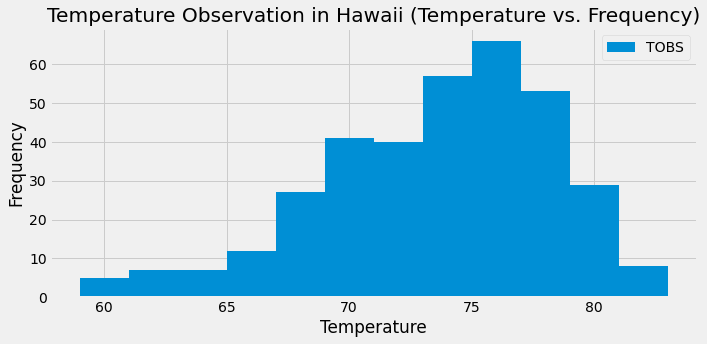

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# (P.S: "TOBS" is short for "Temperature Observation Data" [kinda])
tobs_data = session.query(measurement.tobs).filter(measurement.date >= prior_year).\
    filter(measurement.station == "USC00519281").order_by(measurement.date).all()

# (Saving data into a Dataframe)
tobs_df = pd.DataFrame(tobs_data, columns=["TOBS"])

# (Actually plotting the data, bins=12 was given to us)
tobs_df.plot.hist(bins=12, title="Temperature Observation in Hawaii (Temperature vs. Frequency)", figsize=(10,5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Images/Temperature Observation in Hawaii.png")
plt.show()

# Close session

In [19]:
# Close Session
session.close()